# Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data from CSV file
try:
    data = pd.read_csv('dFBA_Textbook_Model_Reaction_Fluxes.csv', sep='\t')
except IOError:
    print("Error: File not found or could not be opened.")
    exit(1)

# Extract column names from header
col_names = list(data.columns)[1:]

# Drop first column ('Time')
data = data.drop(columns=['Time (s)'])

# Remove missing values (if any)
#data = data.dropna()

# Scale the data
scaled_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Normalize the data by columns
normalized_data = (scaled_data - np.min(scaled_data, axis=0)) / (np.max(scaled_data, axis=0) - np.min(scaled_data, axis=0))

# Replace missing values with zeros
normalized_data = normalized_data.fillna(0)

# Store the normalized data in a new Pandas dataframe
df = pd.DataFrame(normalized_data, columns=data.columns)
print(df)

      ACALD  ACALDt  ACKr    ACONTa    ACONTb  ACt2r  ADK1     AKGDH  AKGt2r  \
0       0.0     0.0   0.0  0.100669  0.100669    0.0   0.0  0.111748     0.0   
1       0.0     0.0   0.0  0.100669  0.100669    0.0   0.0  0.111748     0.0   
2       0.0     0.0   0.0  0.100669  0.100669    0.0   0.0  0.111748     0.0   
3       0.0     0.0   0.0  0.100669  0.100669    0.0   0.0  0.111748     0.0   
4       0.0     0.0   0.0  0.100669  0.100669    0.0   0.0  0.111748     0.0   
...     ...     ...   ...       ...       ...    ...   ...       ...     ...   
3751    0.0     0.0   0.0  0.060108  0.060108    0.0   0.0  0.069503     0.0   
3752    0.0     0.0   0.0  0.107118  0.107118    0.0   0.0  0.118118     0.0   
3753    0.0     0.0   0.0  0.136697  0.136697    0.0   0.0  0.147333     0.0   
3754    0.0     0.0   0.0  0.100706  0.100706    0.0   0.0  0.111785     0.0   
3755    0.0     0.0   0.0  0.072957  0.072957    0.0   0.0  0.084361     0.0   

      ALCD2x  ...  SUCCt2_2  SUCCt3    

# PCA

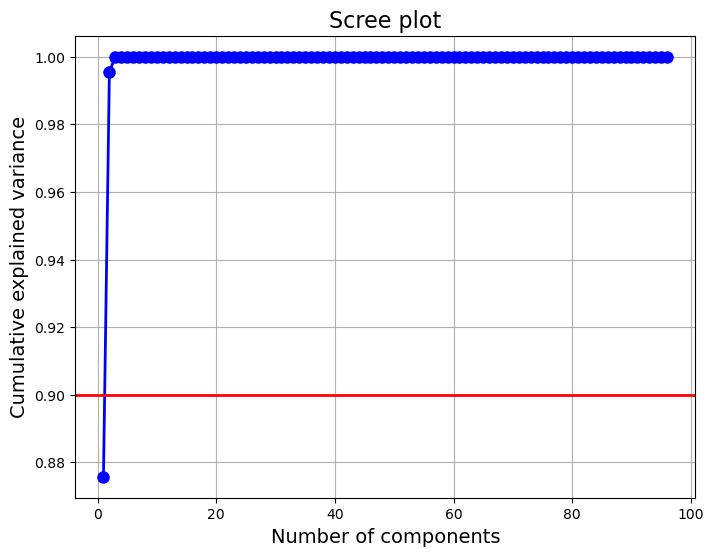

Number of components that explain 90% of variance:  2


In [34]:
# Apply PCA
pca = PCA()
pca.fit(df)

# Compute explained variance ratio
var_ratio = pca.explained_variance_ratio_

# Compute cumulative explained variance
cum_var = np.cumsum(var_ratio)

# Plot scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1,len(var_ratio)+1), cum_var, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of components', fontsize=14)
plt.ylabel('Cumulative explained variance', fontsize=14)
plt.title('Scree plot', fontsize=16)
plt.axhline(y=0.90, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.show()

# Determine number of components that explain 90% of variance
n_components = np.argmax(cum_var >= 0.90) + 1
print("Number of components that explain 90% of variance: ", n_components)

# Perform PCA with n_components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(df)

# Store PCA results in a new Pandas dataframe
df_pca = pd.DataFrame(pca_data, columns=['PC'+str(i+1) for i in range(n_components)])


C:\Users\elysi\AppData\Local\Temp\ipykernel_24124\12264122.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='viridis')


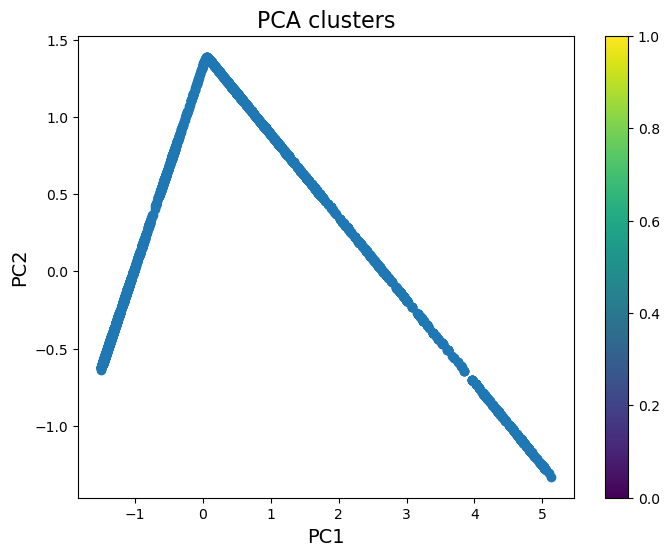

In [37]:
# Plot PCA clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='viridis')
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('PCA clusters', fontsize=16)
plt.colorbar()
plt.show()

# Non-negative Matrix Factorization

c:\Users\elysi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Basis vectors (W):
[[0.         0.00746143 0.         0.07235783 1.47873421]
 [0.         0.00746143 0.         0.07235783 1.47873421]
 [0.         0.00746143 0.         0.07235783 1.47873421]
 ...
 [0.         0.00714658 0.         0.1682146  1.41871141]
 [0.         0.0074611  0.         0.07245742 1.47867185]
 [0.         0.04765382 0.         0.00225061 1.50217671]]
Coefficients (H):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.44759427e-03
  1.44759427e-03 0.00000000e+00 0.00000000e+00 1.72008804e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.27306897e-03
  0.00000000e+00 8.08035591e-01 1.44759427e-03 1.55198749e-03
  0.00000000e+00 4.79566278e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.46203431e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 8.02167120e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.50705534e-03
  0.00000000e+00 0.00000000e+00 8.09793372e-01 8.07945638e-01
  7.97242575e-01 0.00000000e+00 0.00000000e+00 3.09

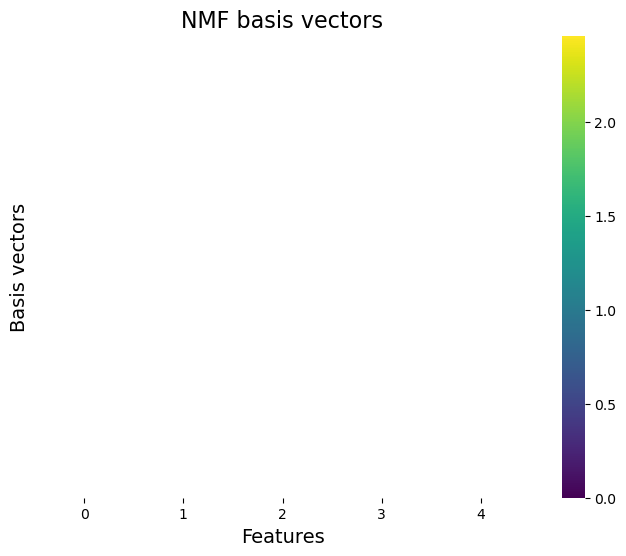

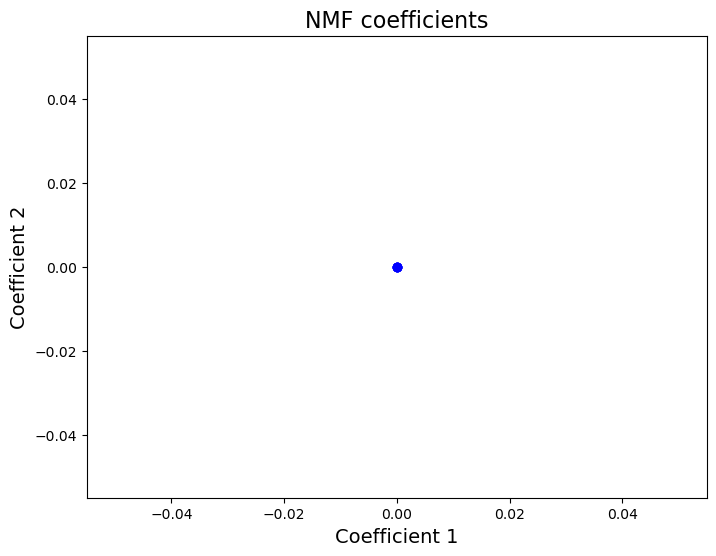

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF

# Apply NMF
model = NMF(n_components=5, init='random', random_state=0)
W = model.fit_transform(df)
H = model.components_

# Print results
print("Basis vectors (W):")
print(W)
print("Coefficients (H):")
print(H)

# Create heatmap of basis vectors
plt.figure(figsize=(8, 6))
sns.heatmap(W, cmap='viridis', linewidths=.5, yticklabels=False)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Basis vectors', fontsize=14)
plt.title('NMF basis vectors', fontsize=16)
plt.show()

# Create scatter plot of coefficients
plt.figure(figsize=(8, 6))
plt.scatter(H[:, 0], H[:, 1], c='blue')
plt.xlabel('Coefficient 1', fontsize=14)
plt.ylabel('Coefficient 2', fontsize=14)
plt.title('NMF coefficients', fontsize=16)
plt.show()

# ICA

c:\Users\elysi\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


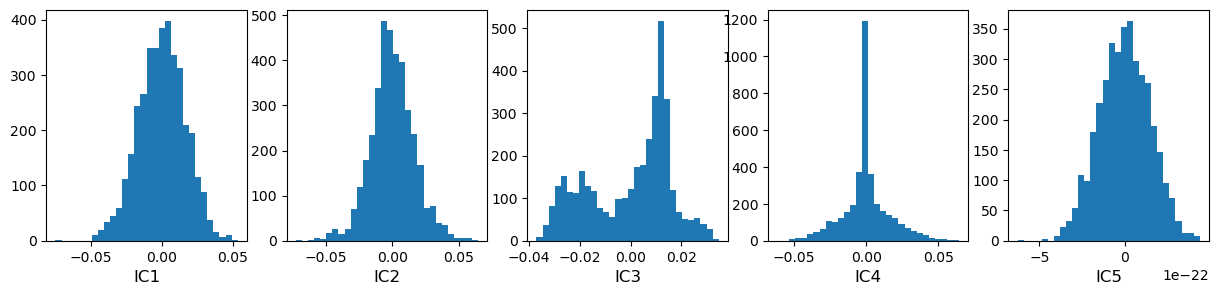

In [46]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Apply ICA
ica = FastICA(n_components=5, random_state=0)
ica_data = ica.fit_transform(df)

# Store ICA results in a new Pandas dataframe
df_ica = pd.DataFrame(ica_data, columns=['IC'+str(i+1) for i in range(5)])

# Plot ICA components
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].hist(df_ica.iloc[:, i], bins=30)
    axs[i].set_xlabel('IC'+str(i+1), fontsize=12)
plt.show()



# KMeans

c:\Users\elysi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


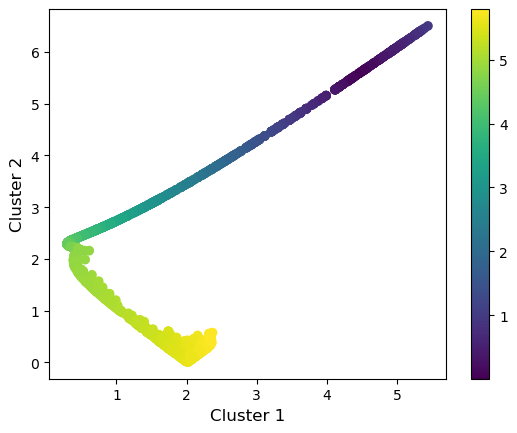

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_data = kmeans.fit_transform(df)

# Store k-means results in a new Pandas dataframe
df_kmeans = pd.DataFrame(kmeans_data, columns=['Cluster'+str(i+1) for i in range(4)])

# Plot k-means clusters
plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], c=df_kmeans.iloc[:, 2], cmap='viridis')
plt.xlabel('Cluster 1', fontsize=12)
plt.ylabel('Cluster 2', fontsize=12)
plt.colorbar()
plt.show()
